In [2]:
import pandas as pd

In [61]:
data = pd.read_csv('abalone_data.csv')

In [62]:
data.head()

sex  width   diam  height  weight  weight_without_shell  inner_weight  \
0   M  0.455  0.365   0.095  0.5140                0.2245        0.1010   
1   M  0.350  0.265   0.090  0.2255                0.0995        0.0485   
2   F  0.530  0.420   0.135  0.6770                0.2565        0.1415   
3   M  0.440  0.365   0.125  0.5160                0.2155        0.1140   
4   I  0.330  0.255   0.080  0.2050                0.0895        0.0395   

   shell_weight  num_rings  
0         0.150         15  
1         0.070          7  
2         0.210          9  
3         0.155         10  
4         0.055          7

In [11]:
is_old = np.array([0 if r < 18 else 1 for r in data.num_rings.values])

In [12]:
np.mean(is_old)

0.03255925305242997

In [13]:
data['is_old'] = is_old

In [22]:
del data['num_rings']

In [16]:
data.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [24]:
data['male'] = np.array([1 if s == 'M' else 0 for s in data.sex.values])
data['female'] = np.array([1 if s == 'F' else 0 for s in data.sex.values])
data['intersex'] = np.array([1 if s == 'I' else 0 for s in data.sex.values])

In [40]:
del data['sex']

In [26]:
import seaborn as sns

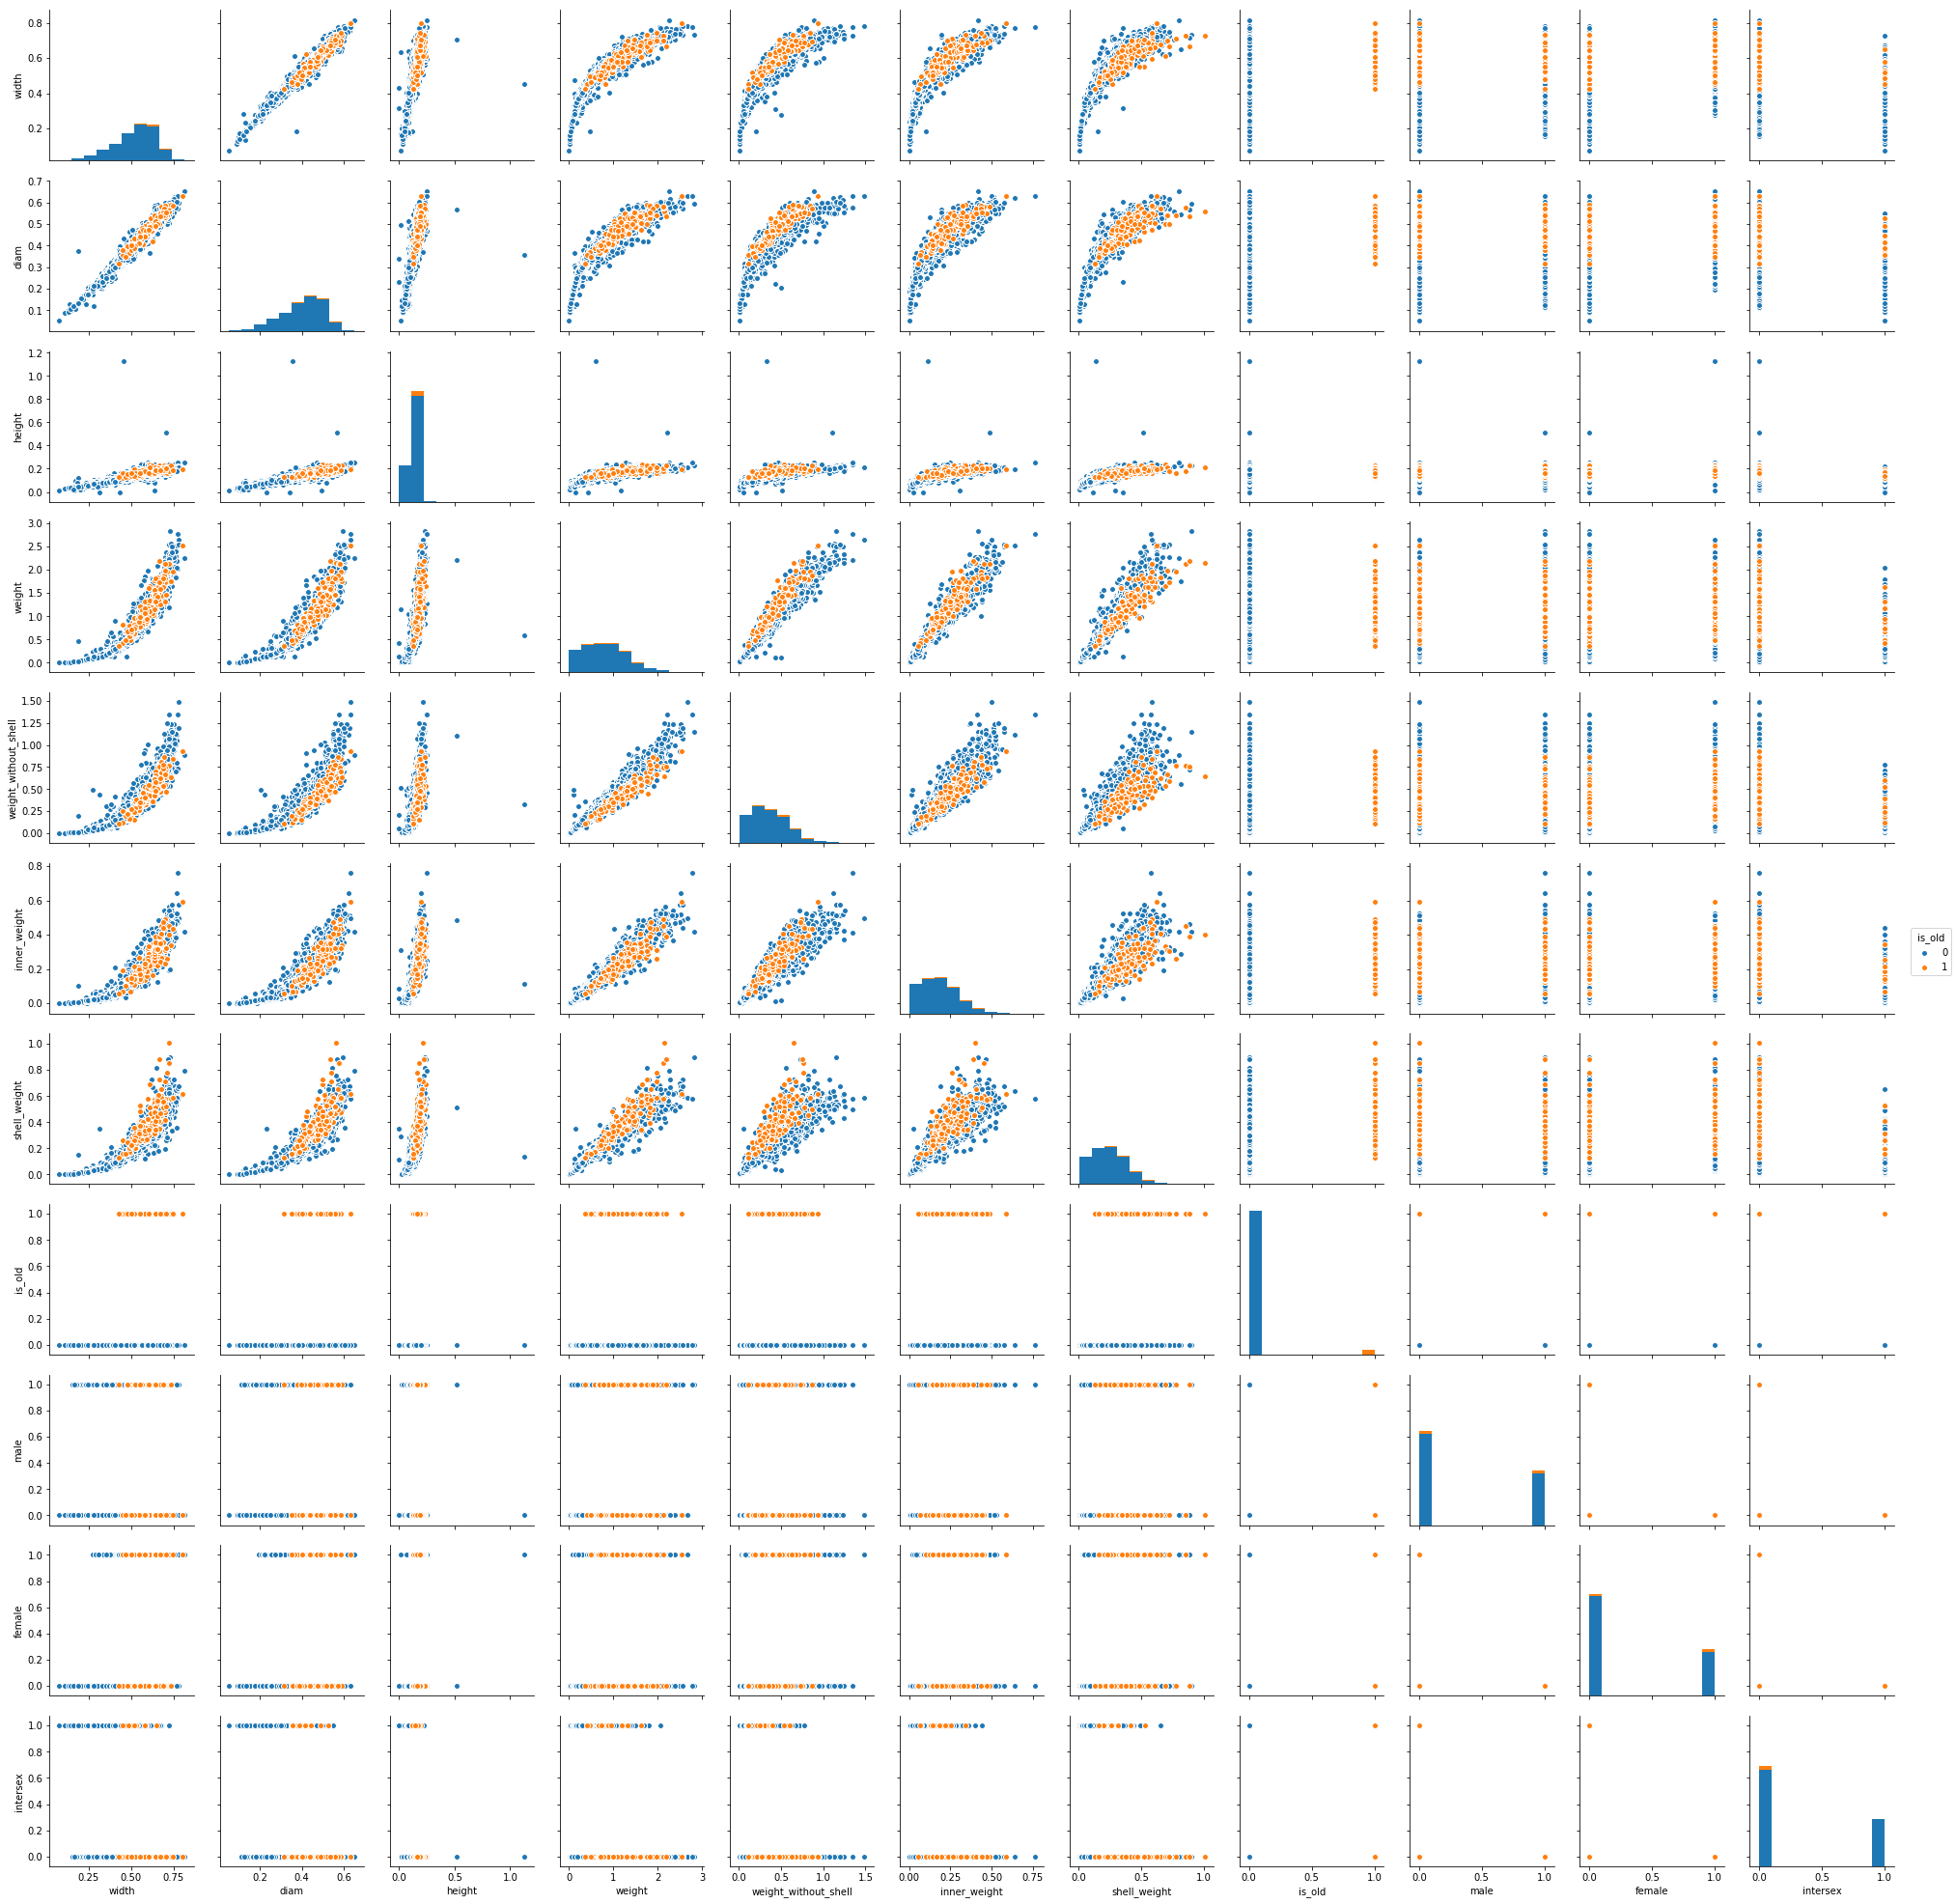

In [27]:
sns.pairplot(data, hue='is_old')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y = data['is_old']

In [30]:
del data['is_old']

In [41]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, y, test_size=0.3, random_state=42)

In [42]:
Xtrain.shape

(2923, 10)

In [67]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [79]:
model = SVC(random_state=42)
model.fit(Xtrain, Ytrain)
print(classification_report(Ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1214
           1       0.00      0.00      0.00        40

   micro avg       0.97      0.97      0.97      1254
   macro avg       0.48      0.50      0.49      1254
weighted avg       0.94      0.97      0.95      1254



/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour, TomekLinks, OneSidedSelection

In [162]:
sampler = SMOTE(random_state=42)

In [163]:
Xres, Yres = sampler.fit_resample(Xtrain, Ytrain)

In [164]:
np.mean(Yres)

0.5

In [165]:
model = SVC(random_state=42)
model.fit(Xres, Yres)
print(classification_report(Ytest, model.predict(Xtest)))

/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1214
           1       0.14      0.82      0.24        40

   micro avg       0.84      0.84      0.84      1254
   macro avg       0.57      0.83      0.58      1254
weighted avg       0.97      0.84      0.89      1254

